In [1]:
### Geoviews Plot, DJF, JJA
import xarray as xr
import pandas as pd
import numpy as np
import warnings
import time
import os

import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
hv.notebook_extension()

In [2]:
ds=xr.open_mfdataset(
    '/g/data/oe9/user/rg6346/VI_mask_nc/NDVI/NDVI_????.nc',
    chunks=dict(long=176)) 
ds=ds.rename({'ndvi_evi':'ndvi'})
ds=ds.drop('band')
ds['ndvi']=ds.ndvi/10000;
ds

<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 388)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi     (time, lat, long) float64 dask.array<shape=(388, 3147, 3344), chunksize=(20, 3147, 176)>

In [3]:
ndvi_q=ds.ndvi.resample(time='Q-FEB').mean(dim='time')
ndvi_jja=ndvi_q.where(ndvi_q['time.season']=='JJA',drop=True)
ndvi_djf=ndvi_q.where(ndvi_q['time.season']=='DJF',drop=True)



/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [4]:
%opts Image {+framewise} [colorbar=True]
%output max_frames=1000 
%output size=200
%opts Image [projection=crs.Miller()] (cmap='Greens')

:HoloMap   [time]
   :Image   [long,lat]   (ndvi)
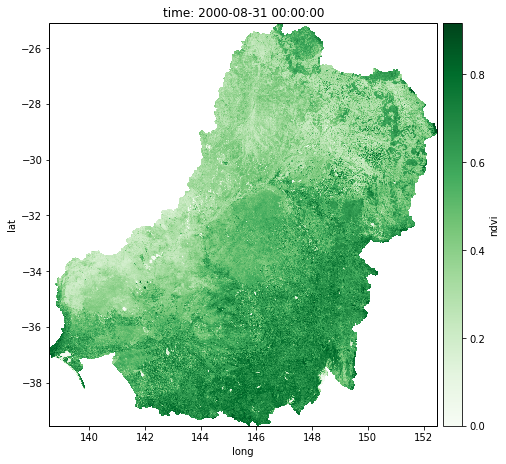
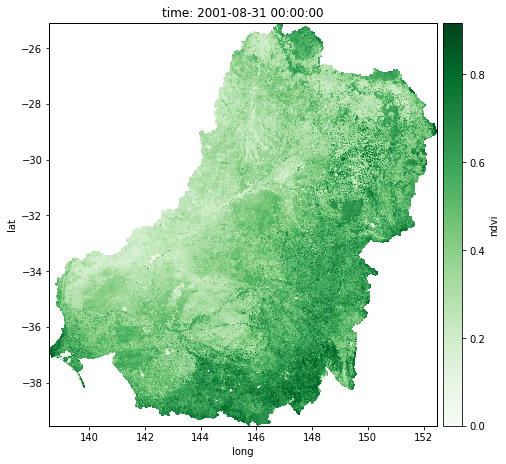
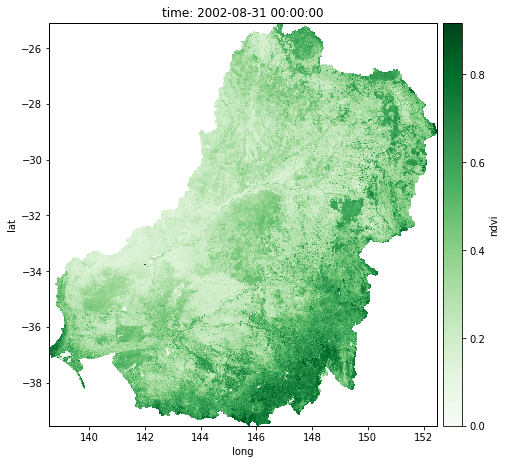
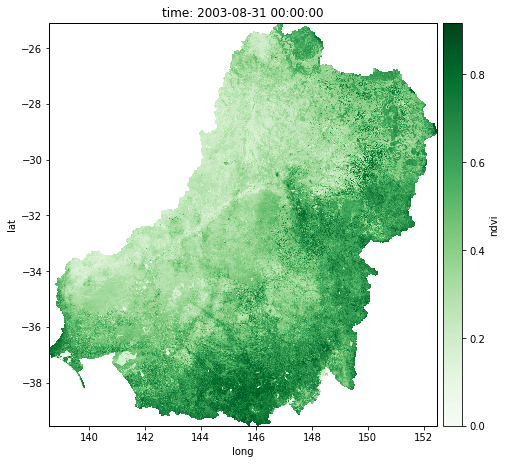
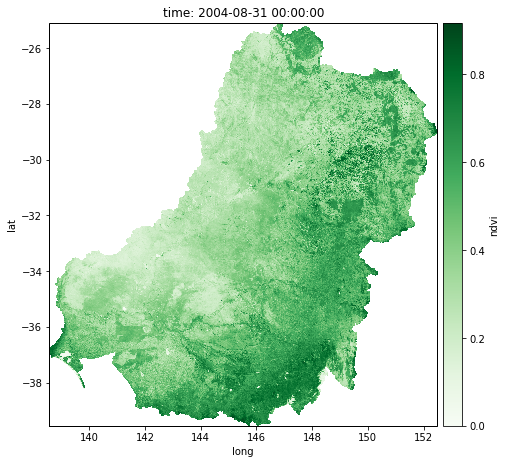
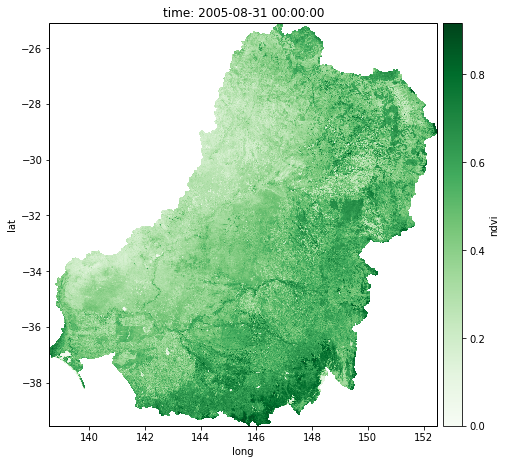
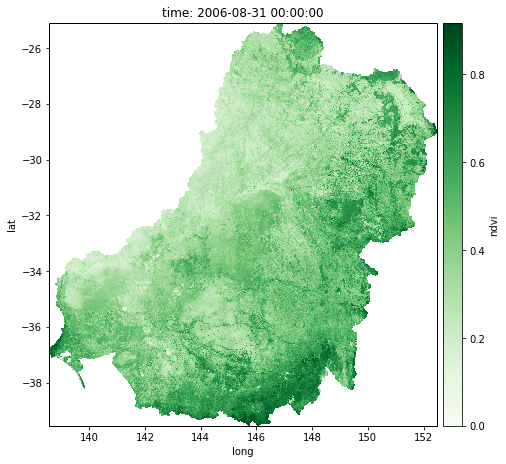
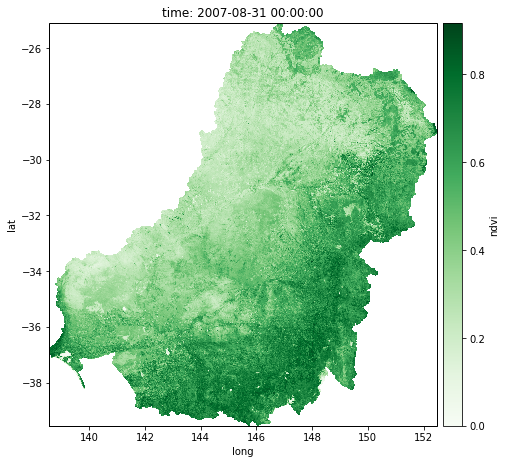
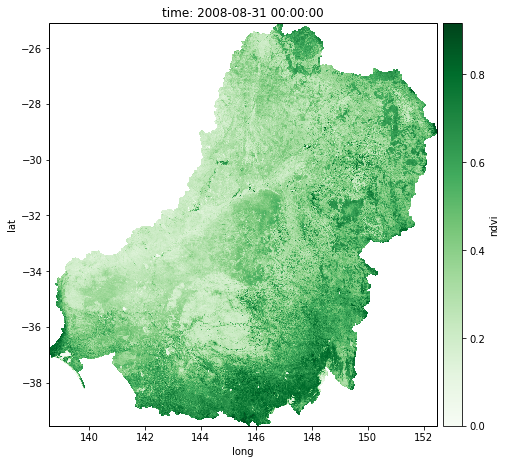
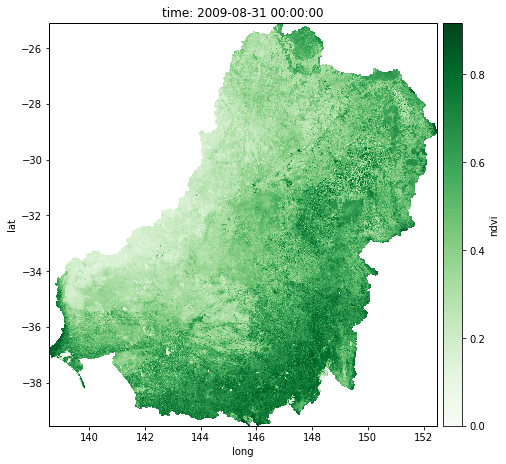
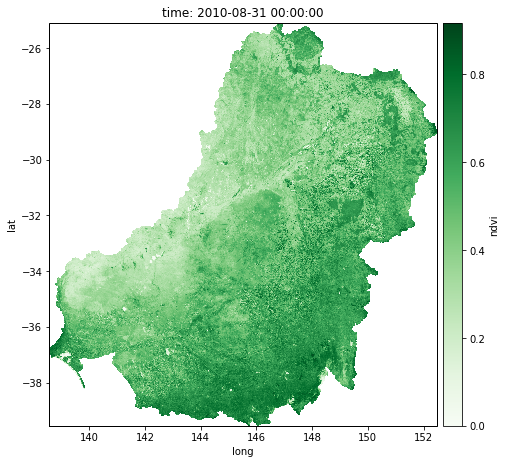
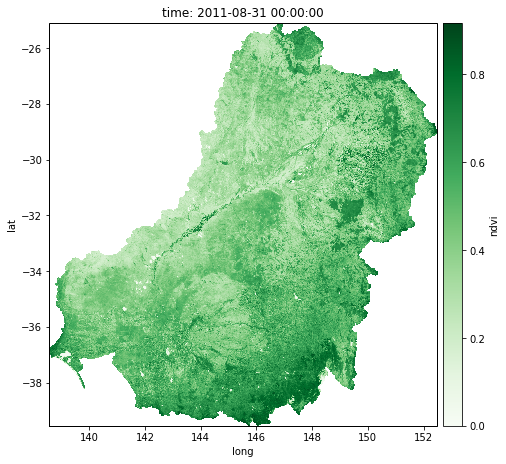
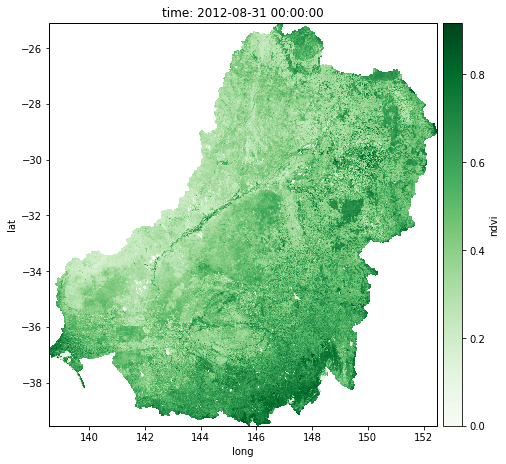
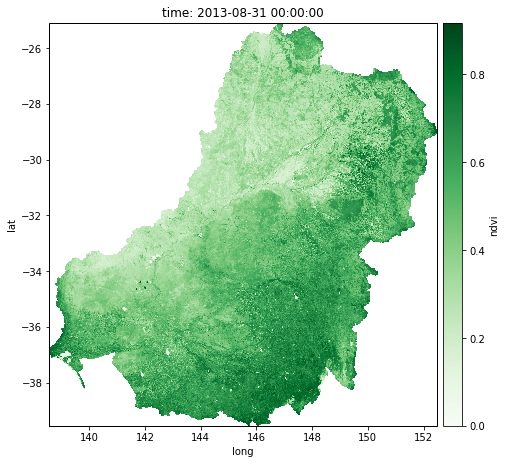
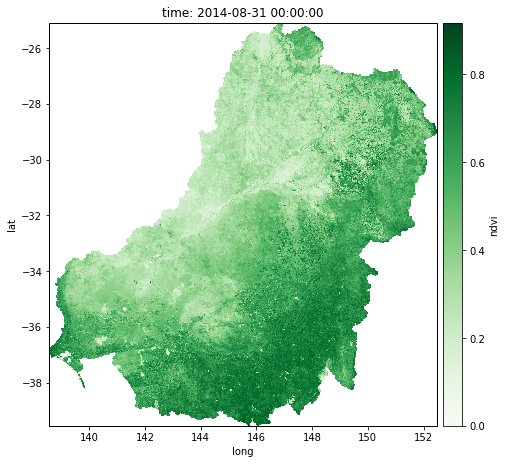
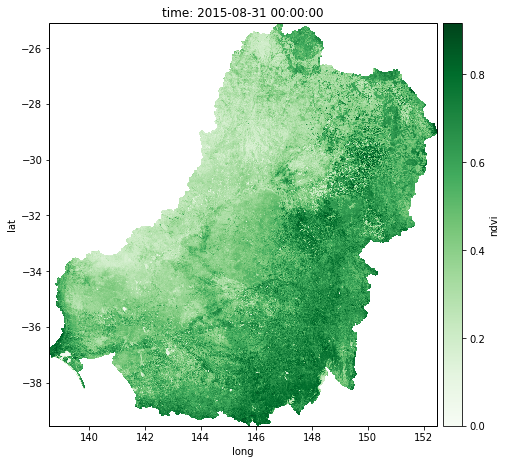
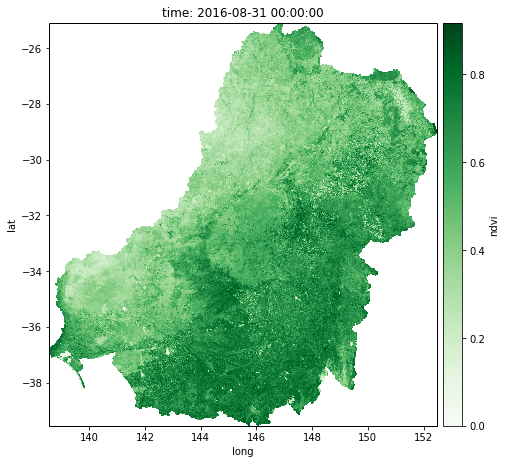

In [5]:
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore", "RuntimeWarning")

warnings.filterwarnings('ignore')

kdims = ['time', 'long', 'lat']
vdims = ['ndvi']

ndvi_jja_gv = gv.Dataset(ndvi_jja, kdims=kdims, vdims=vdims)
ndvi_jja_gv.to(gv.Image, ['long', 'lat'])

In [ ]:
ndvi_djf_gv = gv.Dataset(ndvi_djf, kdims=kdims, vdims=vdims)
warnings.filterwarnings('ignore')

ndvi_djf_gv.to(gv.Image, ['long', 'lat'])